In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def load_images_from_folder(folder, max_images_per_class=None, flatten=True):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        label_folder_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_folder_path):
            count_images_for_class = 0
            print("label_folder_path: ", label_folder_path)
            for image_file in os.listdir(label_folder_path):
                if max_images_per_class is not None and count_images_for_class >= max_images_per_class:
                    print(f"Reached maximum number of images for class {label_folder}. Skipping the rest.")
                    break
                count_images_for_class += 1
                image_path = os.path.join(label_folder_path, image_file)
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (48, 48))
                if flatten:
                    images.append(img.flatten())
                else:
                    images.append(img)
                labels.append(label_folder)
    return np.array(images), np.array(labels)

In [3]:
data_path = '../../Data/fer2013/'
images_train, labels_train = load_images_from_folder(f"{data_path}train", max_images_per_class=None, flatten=False)
images_test, labels_test = load_images_from_folder(f"{data_path}validation", max_images_per_class=None, flatten=False)

all_images = np.concatenate((images_train, images_test))
all_labels = np.concatenate((labels_train, labels_test))

label_folder_path:  ../../Data/fer2013/train/happy
label_folder_path:  ../../Data/fer2013/train/sad
label_folder_path:  ../../Data/fer2013/train/fear
label_folder_path:  ../../Data/fer2013/train/surprise
label_folder_path:  ../../Data/fer2013/train/neutral
label_folder_path:  ../../Data/fer2013/train/angry
label_folder_path:  ../../Data/fer2013/train/disgust
label_folder_path:  ../../Data/fer2013/validation/happy
label_folder_path:  ../../Data/fer2013/validation/sad
label_folder_path:  ../../Data/fer2013/validation/fear
label_folder_path:  ../../Data/fer2013/validation/surprise
label_folder_path:  ../../Data/fer2013/validation/neutral
label_folder_path:  ../../Data/fer2013/validation/angry
label_folder_path:  ../../Data/fer2013/validation/disgust


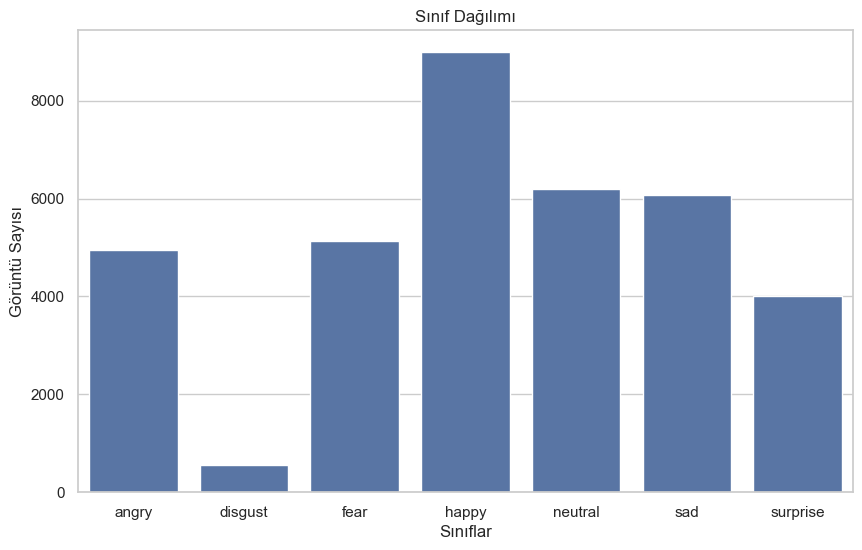

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

unique_labels, counts = np.unique(all_labels, return_counts=True)
data = pd.DataFrame({
    'Sınıflar': unique_labels,
    'Sayı': counts
})

sns.set_theme(style='whitegrid')

# Seaborn ile barplot çiz
plt.figure(figsize=(10, 6))
sns.barplot(x="Sınıflar", y="Sayı", data=data)

plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')

plt.show()


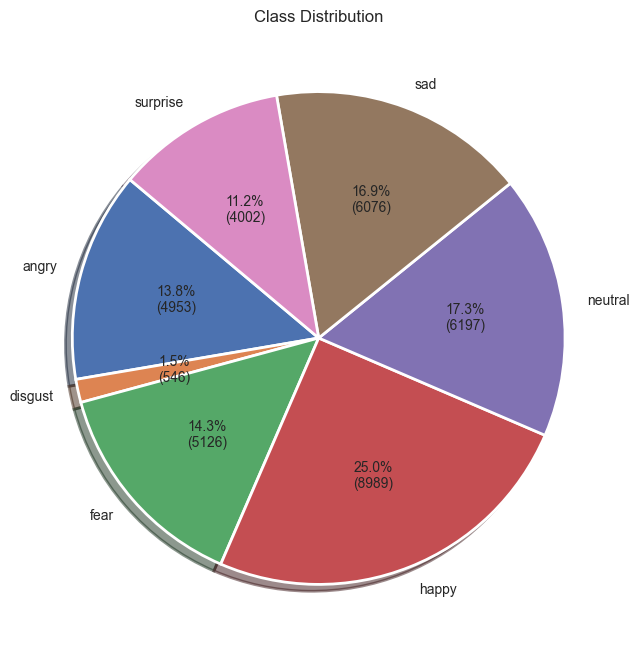

In [24]:
import matplotlib.pyplot as plt

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique_labels, autopct=lambda pct: func(pct, counts),
        startangle=140, shadow=True, textprops={'fontsize': 10}, labeldistance=1.1,
                wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 2, 
                      'antialiased': True},
                      )
plt.title('Class Distribution')
plt.show()